# Scikit-Learn

### Table of Contents:
- Classification
    - KNN
    - Naive Bayes
    - Decision Tree's
    - MLP
    - SVM
- Clustering
    - KMeans
    - DBSCAN
    - Agglomerative (Hierarchical) Clustering
    
Documentation on all of the algorithms listed here:
http://scikit-learn.org/stable/

## Imports

In [24]:
#related packages
import numpy as np
import scipy as sci

#plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

#scikit packages
from sklearn import neighbors, datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier



In [10]:
#loading Datasets
iris1 = datasets.load_iris()

# Classification

## K-Nearest Neighbors

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

scikit-learn implements two different nearest neighbors classifiers: KNeighborsClassifier implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user. RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius r of each training point, where r is a floating-point value specified by the user.

The k-neighbors classification in KNeighborsClassifier is the more commonly used of the two techniques. The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

In cases where the data is not uniformly sampled, radius-based neighbors classification in RadiusNeighborsClassifier can be a better choice. The user specifies a fixed radius r, such that points in sparser neighborhoods use fewer nearest neighbors for the classification. For high-dimensional parameter spaces, this method becomes less effective due to the so-called “curse of dimensionality”.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied which is used to compute the weights.

Link: http://scikit-learn.org/stable/modules/neighbors.html

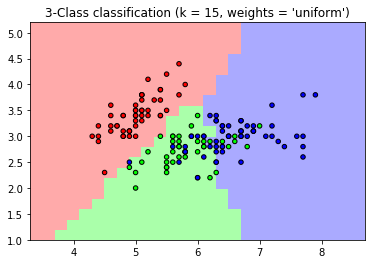

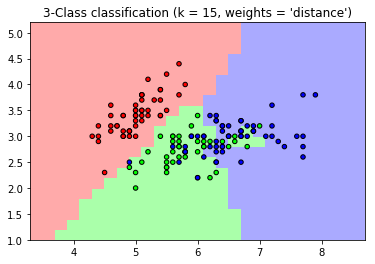

In [11]:
def manipIris():
    # we only take the first two features. We could avoid this ugly
    # slicing by using a two-dim dataset
    return iris1.data[:, :2], iris1.target

def KNN(k, weights, Data, Labels):
    # we create an instance of Neighbours Classifier and fit the data.
    classifier = neighbors.KNeighborsClassifier(k, weights=weights)
    
    #run the algorithm on our data
    classifier.fit(Data, Labels)
    return classifier

def plot(classifier, data, labels, h, k, weights):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xboundry, yboundry = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    pred = classifier.predict(np.c_[xboundry.ravel(), yboundry.ravel()])

    # Put the result into a color plot
    pred = pred.reshape(xboundry.shape)
    plt.figure()
    plt.pcolormesh(xboundry, yboundry, pred, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
    
    plt.xlim(xboundry.min(), xboundry.max())
    plt.ylim(yboundry.min(), yboundry.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (k, weights))

    plt.show()


def main():
    data, labels = manipIris()
    k = 15
    for weights in ['uniform', 'distance']:
        
        classifier = KNN(k, weights, data, labels)
        
        plot(classifier, data, labels, 0.2, k, weights)
main()

## Naive Bayes

- Link: http://scikit-learn.org/stable/modules/naive_bayes.html

### Gaussian Naive Bayes
GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:
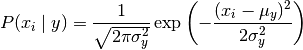
The parameters \sigma_y and \mu_y are estimated using maximum likelihood.
read more about it here: http://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes

In [12]:
classifier = GaussianNB()
y_pred = classifier.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d" % (iris.data.shape[0],(iris.target != y_pred).sum()))


Number of mislabeled points out of a total 150 points : 6


### Multinomial Naive Bayes
MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). 

Read more about it here: http://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes

In [21]:
data = np.random.randint(5, size=(6, 100))
labels = np.array([1, 2, 3, 4, 5, 6])
sample = data[2:3]
print("Sample: ", sample)

classifier = MultinomialNB()
classifier.fit(data, labels)
print("Predicted Label for sample: ", classifier.predict(sample))

Sample:  [[1 3 2 4 3 0 2 3 3 0 0 4 2 2 1 3 2 1 3 3 2 2 1 1 0 2 3 3 2 3 2 0 3 0 3 0
  3 1 2 1 2 0 4 0 1 4 2 4 1 0 4 1 1 1 0 4 3 1 0 4 0 1 1 0 2 3 3 3 0 2 1 0
  0 1 3 2 4 2 4 4 1 0 0 2 4 1 2 4 0 3 1 0 0 4 2 1 4 4 1 1]]
Predicted Label for sample:  [3]


### Bernoulli Naive Bayes

BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).

In [20]:
data = np.random.randint(5, size=(6, 100))
labels = np.array([1, 2, 3, 4, 5, 6])
sample = data[4:5]
print("Sample: ", sample)

classifier = BernoulliNB()
classifier.fit(data, labels)
print("Predicted Label for sample: ", classifier.predict(sample))

Sample:  [[1 3 1 3 4 1 4 3 0 0 1 1 3 4 3 0 4 4 2 4 3 4 3 4 3 1 3 3 0 0 4 3 1 1 4 0
  2 4 0 3 3 2 3 2 3 1 4 1 1 0 2 2 0 0 0 3 2 0 1 3 1 0 4 2 3 2 1 1 3 0 0 1
  1 4 3 0 0 2 0 3 2 0 0 0 0 2 0 4 0 1 0 1 0 1 0 0 0 3 0 0]]
Predicted Label for sample:  [5]


## Decision Trees

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of size [n_samples, n_features] holding the training samples, and an array Y of integer values, size [n_samples], holding the class labels for the training sample.
- Scikit learn uses a custom version of CART
link: http://scikit-learn.org/stable/modules/tree.html

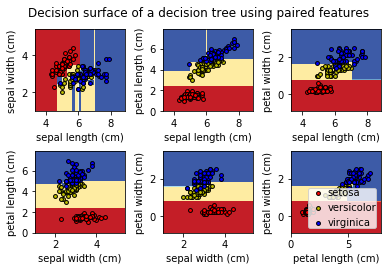

In [25]:

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = datasets.load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## Multi-Layer Perceptron

https://www.python-course.eu/neural_networks_with_scikit.php

In [26]:
"""
SECTION 1 : Load and setup data for training
"""
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
datatrain = sns.load_dataset('iris')

# Change string value to numeric
datatrain.set_value(datatrain['species']=='setosa',['species'],0)
datatrain.set_value(datatrain['species']=='versicolor',['species'],1)
datatrain.set_value(datatrain['species']=='virginica',['species'],2)
datatrain = datatrain.apply(pd.to_numeric)

# Change dataframe to array
datatrain_array = datatrain.as_matrix()

# Split x and y (feature and target)
X_train, X_test, y_train, y_test = train_test_split(datatrain_array[:,:4],
                                                    datatrain_array[:,4],
                                                    test_size=0.2)

"""
SECTION 2 : Build and Train Model
Multilayer perceptron model, with one hidden layer.
input layer : 4 neuron, represents the feature of Iris
hidden layer : 10 neuron, activation using ReLU
output layer : 3 neuron, represents the class of Iris, Softmax Layer
optimizer = stochastic gradient descent with no batch-size
loss function = categorical cross entropy
learning rate = 0.01
epoch = 500
"""

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10),
                    solver='sgd',
                    learning_rate_init=0.01,
                    max_iter=500)

# Train the model
mlp.fit(X_train, y_train)

# Test the model
print(mlp.score(X_test,y_test))

sl = 5.8
sw = 4
pl = 1.2
pw = 0.2
data = [[sl,sw,pl,pw]]
print(mlp.predict(data))

1.0
[0.]


c:\users\faust\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
c:\users\faust\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
c:\users\faust\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


## Support Vector Machines

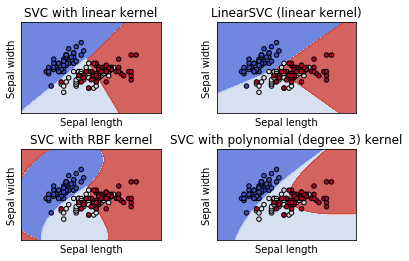

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

# Clustering

## KMeans

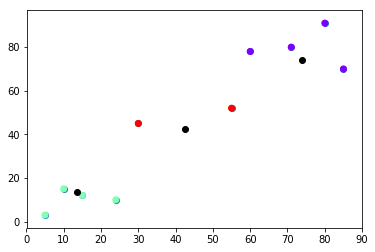

In [28]:
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np  
from sklearn.cluster import KMeans 

X = np.array([[5,3],  
     [10,15],
     [15,12],
     [24,10],
     [30,45],
     [85,70],
     [71,80],
     [60,78],
     [55,52],
     [80,91],])

plt.scatter(X[:,0],X[:,1], label='True Position')  

kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)  


plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')  
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,0], color='black') 

## DBSCAN


SECTION 2 : Build and Train Model
Multilayer perceptron model, with one hidden layer.
input layer : 4 neuron, represents the feature of Iris
hidden layer : 10 neuron, activation using ReLU
output layer : 3 neuron, represents the class of Iris, Softmax Layer
optimizer = stochastic gradient descent with no batch-size
loss function = categorical cross entropy
learning rate = 0.01
epoch = 500

Estimated number of clusters: 3
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.883
Silhouette Coefficient: 0.626


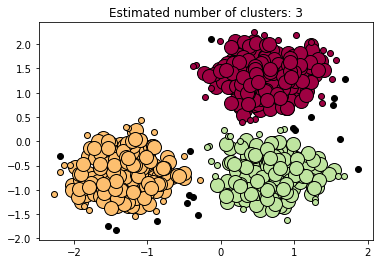

In [29]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Aglomeritive Clustering

c:\users\faust\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Compute structured hierarchical clustering...
Elapsed time:  0.5660324096679688
Number of pixels:  7752
Number of clusters:  15


c:\users\faust\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


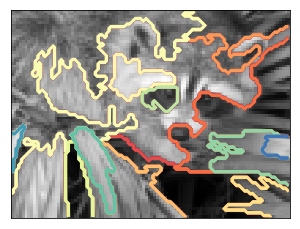

In [30]:
import time as time

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering


# #############################################################################
# Generate data
try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)

# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255.

X = np.reshape(face, (-1, 1))

# #############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*face.shape)

# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 15  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, face.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

# #############################################################################
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(face, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.Spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()